# LINEAR REGRESSION USING SKLEARN

In [192]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [193]:
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

In [194]:
print(diabetes.DESCR)
print(diabetes.data.shape)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [196]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [197]:
predictions = model.predict(X_test)

In [198]:
mse = mean_squared_error(y_test, predictions)

In [199]:
print("mse =", mse)

mse = 2900.1936284934814


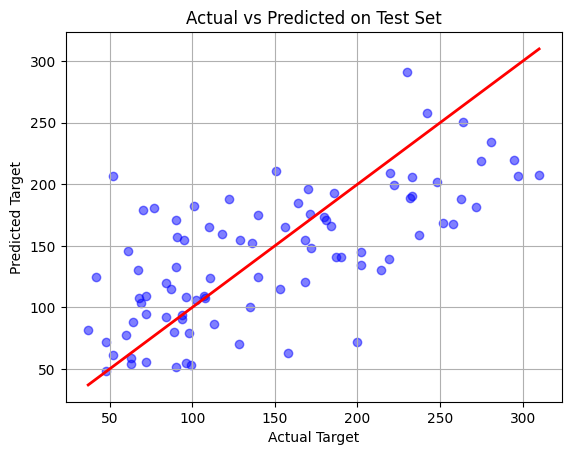

In [200]:
plt.scatter(y_test, predictions, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel("Actual Target")
plt.ylabel("Predicted Target")
plt.title("Actual vs Predicted on Test Set")
plt.grid(True)
plt.show()

- - - 

# NOW IMPLEMENTING LINEAR REGRESSION FOR SAME DATASET FROM SCRATCH


In [201]:
import numpy as np # will use numpy

In [202]:
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
# reshape y to make it compatible for matrix operations
y = y.reshape(-1, 1)
X = np.hstack((np.ones((X.shape[0], 1)), X))  # add bias term


In [203]:
# Initialize weights 
np.random.seed(42)
w = np.random.randn(X.shape[1], 1)  # shape: (11, 1) — includes bias

In [204]:
def predict(X, w):
    return X @ w  # matrix multiplication

def mse(y_pred, y_true):
    return np.mean((y_pred - y_true) ** 2)

def compute_gradients(X, y, y_pred):
    n = X.shape[0]
    dw = (2 / n) * X.T @ (y_pred - y)
    return dw

In [205]:
learning_rate = 0.1
epochs = 1000

for epoch in range(epochs):
    y_pred = predict(X, w)
    loss = mse(y_pred, y)
    
    dw = compute_gradients(X, y, y_pred)
    w -= learning_rate * dw

    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss = {loss:.4f}")

Epoch 0: Loss = 28918.9033
Epoch 100: Loss = 5256.7689
Epoch 200: Loss = 4769.1851
Epoch 300: Loss = 4409.3879
Epoch 400: Loss = 4140.3155
Epoch 500: Loss = 3936.0348
Epoch 600: Loss = 3778.3614
Epoch 700: Loss = 3654.5105
Epoch 800: Loss = 3555.4631
Epoch 900: Loss = 3474.8294


In [206]:
print("Final weights (including bias):")
print(w)

Final weights (including bias):
[[ 152.13348416]
 [  48.07904537]
 [ -32.40336002]
 [ 260.02491193]
 [ 180.50541041]
 [  35.6269237 ]
 [  11.95658009]
 [-147.62827061]
 [ 133.313806  ]
 [ 229.94274344]
 [ 128.09621019]]


In [207]:
weights = w[:-1]  # all except last
bias = w[-1]      # last value
print("Weights:", weights.ravel())
print("Bias:", bias.item())

Weights: [ 152.13348416   48.07904537  -32.40336002  260.02491193  180.50541041
   35.6269237    11.95658009 -147.62827061  133.313806    229.94274344]
Bias: 128.09621019113047


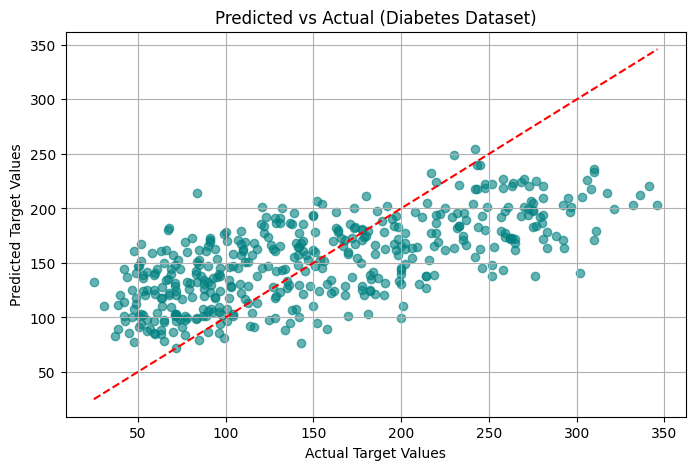

In [208]:

y_pred = predict(X, w)

plt.figure(figsize=(8, 5))
plt.scatter(y, y_pred, alpha=0.6, color='teal')
plt.xlabel("Actual Target Values")
plt.ylabel("Predicted Target Values")
plt.title("Predicted vs Actual (Diabetes Dataset)")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # perfect prediction line
plt.grid(True)
plt.show()

- - - -

# 🚀 Full Pipeline: Linear Regression with Train/Test Split


In [209]:
diabetes = load_diabetes()
X = diabetes.data            # shape: (442, 10)
y = diabetes.target.reshape(-1, 1)  # shape: (442, 1)

🧠 What:
	•	X contains 442 samples with 10 features (already pre-processed by sklearn).
	•	y is the target — a continuous value predicting disease progression.
	•	.reshape(-1, 1) converts the target from shape (442,) to (442, 1) to make it compatible for matrix multiplication.

✅ Why:
	•	Linear regression expects inputs in matrix form. Reshaping ensures dimensions align properly during dot products.

In [210]:
# Normalize features
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X = (X - X_mean) / X_std

🧠 What:
	•	X_mean is a vector of mean values for each feature.
	•	X_std is a vector of standard deviations for each feature.
	•	We normalize X so that all features have mean 0 and standard deviation 1.

✅ Why:
	•	Gradient Descent converges faster when input features are scaled similarly.
	•	This prevents features with large values (like age or BMI) from dominating the model.

In [211]:
# Add bias (intercept) term manually
X = np.hstack([X, np.ones((X.shape[0], 1))])

🧠 What:
	•	We add a column of ones to X → the 11th column now represents the bias term (intercept).
	•	np.hstack horizontally stacks this column to the input matrix.

✅ Why:
	•	This allows us to treat bias b as just another weight. Now we don’t need to separately handle it — it’s built into the model.

In [212]:
np.random.seed(42)  # reproducibility
indices = np.random.permutation(X.shape[0])
split_index = int(0.8 * X.shape[0])

🧠 What:
	•	np.random.permutation gives us a shuffled array of row indices.
	•	split_index determines where to split: 80% of 442 = 353 rows.

✅ Why:
	•	We shuffle the data to ensure random distribution of samples across train/test sets.
	•	Splitting 80/20 is a common practice to balance training and evaluation.

In [213]:
X_train = X[indices[:split_index]]
y_train = y[indices[:split_index]]

X_test = X[indices[split_index:]]
y_test = y[indices[split_index:]]

🧠 What:
	•	First 353 shuffled samples → training set.
	•	Remaining 89 samples → test set.

✅ Why:
	•	We train the model only on training data, and evaluate on unseen test data to check generalization.

In [214]:
w = np.random.randn(X.shape[1], 1)

🧠 What:
	•	We initialize weights (including bias) with random values.
	•	Shape is (11, 1) because we have 10 features + 1 bias.

✅ Why:
	•	Training will adjust these weights through gradient descent to minimize the error.

# Define Functions

In [215]:
def predict(X, w):
    return X @ w

🧠 What:
	•	This performs matrix multiplication $$ \hat{y} = Xw $$ , which is the linear regression prediction formula.

✅ Why:
	•	Predicts the target value using current weights for each input.

In [216]:
def mse(y_pred, y_true):
    return np.mean((y_pred - y_true) ** 2)

🧠 What:
	•	Computes Mean Squared Error (MSE): average squared difference between predicted and actual targets.

✅ Why:
	•	MSE is a standard loss function for regression. We aim to minimize it.

In [217]:
def compute_gradients(X, y, y_pred):
    n = X.shape[0]
    dw = (2 / n) * X.T @ (y_pred - y)
    return dw

🧠 What:
	•	Computes gradients (partial derivatives) of the loss w.r.t weights.
	•	Uses matrix calculus: 
	$$ \frac{2}{n} X^T (Xw - y) $$

✅ Why:
	•	Gradients tell us how to update weights to reduce error.
	•	This is the core of learning in gradient descent.

# Training Loop (Gradient Descent)


In [218]:
learning_rate = 0.01
epochs = 1000
train_losses = []
test_losses = []

🧠 What:
	•	learning_rate controls how big each weight update is.
	•	epochs is how many times we go through the training data.
	•	losses stores the loss at each epoch for later plotting.

In [219]:
for epoch in range(epochs):
    # Predict on training set
    y_pred_train = predict(X_train, w)
    train_loss = mse(y_pred_train, y_train)
    train_losses.append(train_loss)
    
    # Predict on test set
    y_pred_test = predict(X_test, w)
    test_loss = mse(y_pred_test, y_test)
    test_losses.append(test_loss)
    
    # Compute gradients and update weights
    dw = compute_gradients(X_train, y_train, y_pred_train)
    w -= learning_rate * dw
    
    # Optional: Print every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Train Loss = {train_loss:.4f}, Test Loss = {test_loss:.4f}")

Epoch 0: Train Loss = 30485.1949, Test Loss = 25687.7577
Epoch 100: Train Loss = 3242.4555, Test Loss = 3515.5362
Epoch 200: Train Loss = 2795.5610, Test Loss = 3292.4265
Epoch 300: Train Loss = 2784.3309, Test Loss = 3313.0316
Epoch 400: Train Loss = 2782.5923, Test Loss = 3316.8776
Epoch 500: Train Loss = 2781.2676, Test Loss = 3317.9512
Epoch 600: Train Loss = 2780.0570, Test Loss = 3318.6727
Epoch 700: Train Loss = 2778.9270, Test Loss = 3319.3052
Epoch 800: Train Loss = 2777.8629, Test Loss = 3319.8842
Epoch 900: Train Loss = 2776.8547, Test Loss = 3320.4245


🧠 What:
	•	For each epoch:
	•	Compute predictions using current weights
	•	Compute loss
	•	Compute gradients
	•	Update weights using: $$ w = w - lr * gradient $$
	•	Print progress every 100 steps

✅ Why:
	•	This loop optimizes the model.
	•	At each step, we learn better weights that reduce training error.

In [220]:
#  Evaluate on Test Set
y_pred_test = predict(X_test, w)
test_loss = mse(y_pred_test, y_test)
print(f"\nTest MSE: {test_loss:.4f}")


Test MSE: 3320.9361


🧠 What:
	•	Predict values on test set using trained weights.
	•	Compute MSE on test set.

✅ Why:
	•	This tells us how well the model performs on unseen data — critical for assessing generalization.

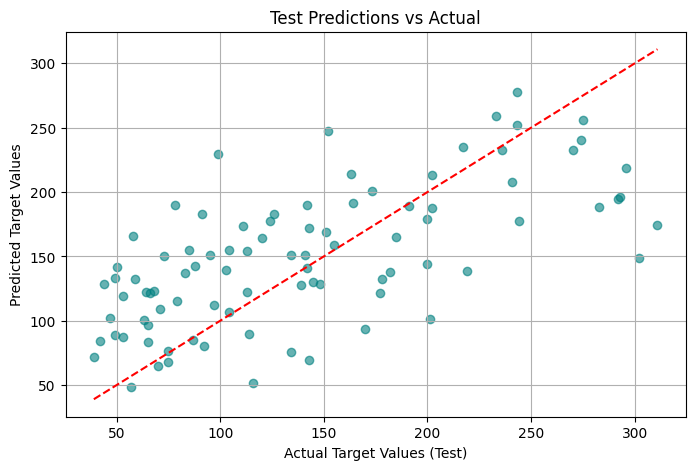

In [221]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_test, alpha=0.6, color='teal')
plt.xlabel("Actual Target Values (Test)")
plt.ylabel("Predicted Target Values")
plt.title("Test Predictions vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid(True)
plt.show()

🧠 What:
	•	Plot predicted vs actual target values.
	•	Red dashed line shows ideal (perfect) prediction.

✅ Why:
	•	This helps visually inspect how close the predictions are to the actual values.
	•	A good model will have points close to the red line.

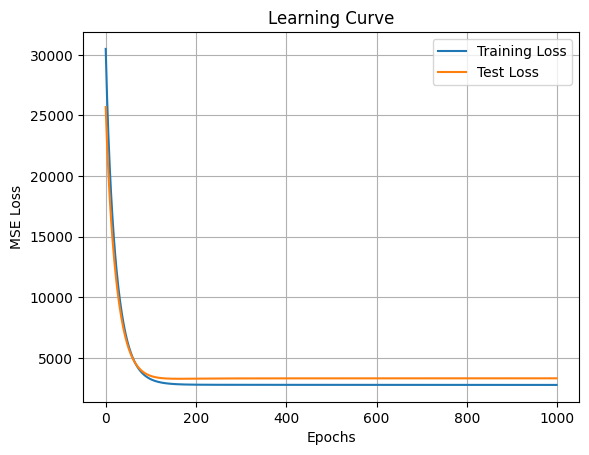

In [222]:
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Learning Curve")
plt.legend()
plt.grid(True)
plt.show()